<a href="https://colab.research.google.com/github/OlyaKuch/sql-data-portfolio/blob/main/Python_for_DA_Module_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Mate_homework

/content/drive/MyDrive/Mate_homework


In [ ]:
events = pd.read_csv("events.csv")
products = pd.read_csv("products.csv")
countries = pd.read_csv("countries.csv")

In [ ]:
print(events.head())
print(products.head())
print(countries.head())

    Order ID Order Date   Ship Date Order Priority Country Code  Product ID  \
0  100640618  10/8/2014  10/18/2014              M          NOR        2103   
1  100983083  8/11/2016   8/11/2016              C          SRB        2103   
2  101025998  7/18/2014   8/11/2014              M          NaN        7940   
3  102230632  5/13/2017   6/13/2017              L          MNE        2455   
4  103435266  8/11/2012   9/18/2012              H          SRB        1270   

  Sales Channel  Units Sold  Unit Price  Unit Cost  
0        Online       650.0      205.70     117.11  
1       Offline      1993.0      205.70     117.11  
2        Online      4693.0      668.27     502.54  
3        Online      1171.0      109.28      35.84  
4       Offline      7648.0       47.45      31.79  
     id        item_type
0  2103           Cereal
1  7940        Household
2  2455          Clothes
3  1270        Beverages
4  8681  Office Supplies
             name alpha-2 alpha-3   region       sub-regi

In [ ]:
events.info()
products.info()
countries.info()

events.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        1330 non-null   int64  
 1   Order Date      1330 non-null   object 
 2   Ship Date       1330 non-null   object 
 3   Order Priority  1330 non-null   object 
 4   Country Code    1248 non-null   object 
 5   Product ID      1330 non-null   int64  
 6   Sales Channel   1330 non-null   object 
 7   Units Sold      1328 non-null   float64
 8   Unit Price      1330 non-null   float64
 9   Unit Cost       1330 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 104.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         12 non-null     int64 
 1   item_type  12 non-null     object
dtypes: int64(1), object(1)
mem

,Order ID,Product ID,Units Sold,Unit Price,Unit Cost
count,1.330000e+03,1330.000000,1328.000000,1330.000000,1330.000000
mean,5.412048e+08,5788.096241,4952.201807,264.893541,187.246812
std,2.573882e+08,2820.728878,2905.198996,217.323460,176.158873
min,1.006406e+08,1270.000000,2.000000,9.330000,6.920000
25%,3.190004e+08,3127.000000,2356.750000,81.730000,35.840000
50%,5.387164e+08,5988.000000,4962.000000,154.060000,97.440000
75%,7.544628e+08,8681.000000,7459.500000,437.200000,263.330000
max,9.998797e+08,8969.000000,9999.000000,668.270000,524.960000


#####**Key fields that connect the three tables**
**"events.csv"** join with **"products.csv"** on: *Product ID*

**"events.csv"** join with **"countries.csv"** on: *Country Code*

In [ ]:
print(events.isnull().sum())
print(products.isnull().sum())
print(countries.isnull().sum())

Order ID          0
Order Date        0
Ship Date         0
Order Priority    0
Country Code      0
Product ID        0
Sales Channel     0
Units Sold        0
Unit Price        0
Unit Cost         0
dtype: int64
id           0
item_type    0
dtype: int64
name          0
alpha-2       0
alpha-3       0
region        0
sub-region    0
dtype: int64


#####**Missing values**

**events.csv**:
- **Country Code** : 82 missing values
- **Units Sold** : 2 missing values

**products.csv**:
no missing value

**countries.csv**:
- **Alpha-2** : 1 missing
- **Region** : 1 missing
- **Sub-region** : 1 missing

In [ ]:
events["Units Sold"] = events["Units Sold"].fillna(events["Units Sold"].median())


Since this is a **numeric** column and only **2 values** were missing, I used the **median** rather than mean to avoid the influence of outliers. This preserves most of the data and prevents introducing bias

In [ ]:
events.dropna(subset=["Country Code"], inplace=True)


These values are essential for analyzing performance by geography. Because **82 rows** out of **1330** rows is a relatively small portion, and it is not possible to reliably fill in this information, I chose to drop them

In [ ]:
countries.dropna(inplace=True)


Since only **1 row** was missing values in multiple columns, and these fields are important for joining regional data, it was safest to remove the row entirely

In [ ]:
print(events.isnull().sum())
print(countries.isnull().sum())


Order ID          0
Order Date        0
Ship Date         0
Order Priority    0
Country Code      0
Product ID        0
Sales Channel     0
Units Sold        0
Unit Price        0
Unit Cost         0
dtype: int64
name          0
alpha-2       0
alpha-3       0
region        0
sub-region    0
dtype: int64


In [ ]:
events.dtypes


,0
Order ID,int64
Order Date,object
Ship Date,object
Order Priority,object
Country Code,object
Product ID,int64
Sales Channel,object
Units Sold,float64
Unit Price,float64
Unit Cost,float64


In [ ]:
events["Order Date"] = pd.to_datetime(events["Order Date"])
events["Ship Date"] = pd.to_datetime(events["Ship Date"])


In [ ]:
print(events.duplicated().sum())


0


In [ ]:
events["Order Priority"] = events["Order Priority"].str.strip().str.upper()


In [ ]:
events.describe()



,Order ID,Order Date,Ship Date,Product ID,Units Sold,Unit Price,Unit Cost
count,1.248000e+03,1248,1248,1248.000000,1248.000000,1248.000000,1248.000000
mean,5.427746e+08,2013-10-11 22:56:32.307692288,2013-11-05 19:40:23.076923136,5756.538462,4953.201122,264.183526,186.349143
min,1.006406e+08,2010-01-01 00:00:00,2010-01-10 00:00:00,1270.000000,2.000000,9.330000,6.920000
25%,3.223002e+08,2011-12-11 06:00:00,2012-01-01 12:00:00,2455.000000,2349.750000,81.730000,35.840000
50%,5.433596e+08,2013-10-15 12:00:00,2013-11-05 12:00:00,5988.000000,4971.500000,154.060000,97.440000
75%,7.534315e+08,2015-08-31 12:00:00,2015-10-07 06:00:00,8293.000000,7471.000000,425.717500,263.330000
max,9.998797e+08,2017-07-22 00:00:00,2017-08-31 00:00:00,8969.000000,9999.000000,668.270000,524.960000
std,2.573962e+08,NaN,NaN,2827.650810,2913.485966,216.526905,175.473997


#####**Anomaly Detection: Justification**
The maximum value is **9999 units**, the minimum value is **2**, which suggests the presence of outliers. Despite this spread, I decided not to remove or transform the outliers, since these values may reflect real, large or small orders. Retaining them preserves the accuracy of total sales analysis. That being said, I would be cautious when interpreting average values, such as mean revenue, and I may use median-based metrics for more stable insights.

In [ ]:
merged = events.merge(products, left_on="Product ID", right_on="id", how="left")


In [ ]:
merged = merged.merge(countries, left_on="Country Code", right_on="alpha-3", how="left")


In [ ]:
merged.drop(columns=["id", "alpha-3"], inplace=True)


In [ ]:
merged.rename(columns={
    "item_type": "Product Category",
    "name": "Country",
    "region": "Region",
    "sub-region": "Sub-Region"
}, inplace=True)


In [ ]:
print(merged.head())
print(merged.columns)


    Order ID Order Date  Ship Date Order Priority Country Code  Product ID  \
0  100640618 2014-10-08 2014-10-18              M          NOR        2103   
1  100983083 2016-08-11 2016-08-11              C          SRB        2103   
2  102230632 2017-05-13 2017-06-13              L          MNE        2455   
3  103435266 2012-08-11 2012-09-18              H          SRB        1270   
4  103450715 2015-03-15 2015-04-18              H          SVK        8681   

  Sales Channel  Units Sold  Unit Price  Unit Cost Product Category  \
0        Online         650      205.70     117.11           Cereal   
1       Offline        1993      205.70     117.11           Cereal   
2        Online        1171      109.28      35.84          Clothes   
3       Offline        7648       47.45      31.79        Beverages   
4        Online        2220      651.21     524.96  Office Supplies   

      Country alpha-2  Region       Sub-Region  
0      Norway      NO  Europe  Northern Europe  
1     

In [ ]:
merged["Revenue"] = merged["Units Sold"] * merged["Unit Price"]
merged["Cost"] = merged["Units Sold"] * merged["Unit Cost"]
merged["Profit"] = merged["Revenue"] - merged["Cost"]


In [ ]:
print("Total number of orders:", merged["Order ID"].nunique())
print("Total units sold:", merged["Units Sold"].sum())
print("Total revenue: $", merged["Revenue"].sum())
print("Total profit: $", merged["Profit"].sum())
print("Number of unique products:", merged["Product ID"].nunique())
print("Number of product categories:", merged["Product Category"].nunique())
print("Number of countries covered:", merged["Country"].nunique())
print("Number of regions covered:", merged["Region"].nunique())


Total number of orders: 1248
Total units sold: 6181595
Total revenue: $ 1601482723.7
Total profit: $ 474117209.17999995
Number of unique products: 12
Number of product categories: 12
Number of countries covered: 45
Number of regions covered: 2


In [ ]:
category_summary = merged.groupby("Product Category")[["Revenue", "Cost", "Profit", "Units Sold"]].sum().sort_values("Revenue", ascending=False)
print(category_summary)


                       Revenue          Cost       Profit  Units Sold
Product Category                                                     
Office Supplies   3.786662e+08  3.052543e+08  73411976.25      581481
Household         2.788744e+08  2.097140e+08  69160454.84      417308
Cosmetics         2.213054e+08  1.332945e+08  88010907.56      506188
Meat              2.034332e+08  1.758517e+08  27581554.00      482195
Baby Food         1.338344e+08  8.357833e+07  50256042.90      524265
Cereal            9.467672e+07  5.390175e+07  40774964.94      460266
Vegetables        8.203849e+07  4.842113e+07  33617356.30      532510
Snacks            6.921349e+07  4.420083e+07  25012661.94      453621
Clothes           6.330732e+07  2.076258e+07  42544746.72      579313
Personal Care     4.375187e+07  3.033670e+07  13415169.32      535322
Beverages         2.742567e+07  1.837433e+07   9051339.06      577991
Fruits            4.955490e+06  3.675454e+06   1280035.35      531135


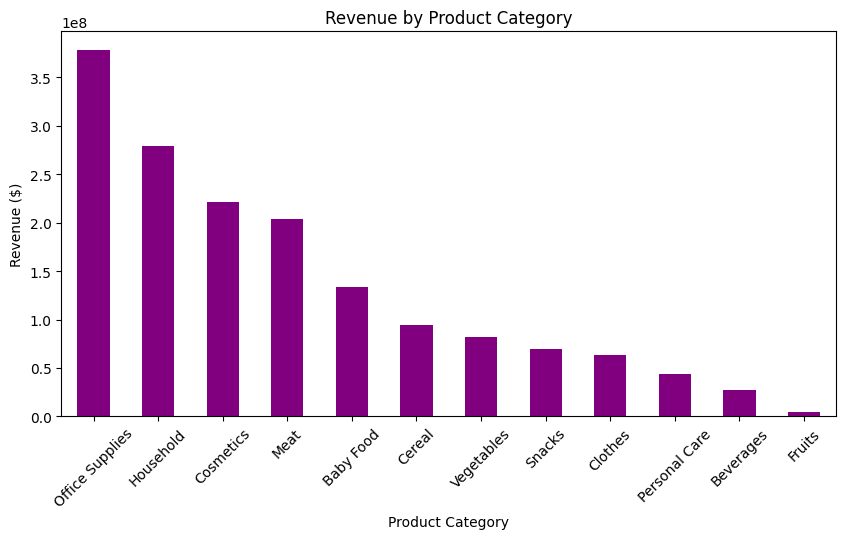

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

category_summary["Revenue"].plot(kind="bar", figsize=(10, 5), title="Revenue by Product Category", color="purple")
plt.ylabel("Revenue ($)")
plt.xlabel("Product Category")
plt.xticks(rotation=45)
plt.show()


**Key observations**:

- **Office Supplies** generated the highest revenue, significantly ahead of other categories. This may indicate high demand or premium pricing.

- **Household, Cosmetics**, and **Meat** also performed well, suggesting they are core contributors to company income.

- Categories like **Beverages** and **Fruits** show the lowest revenue, which could be due to low pricing, lower volume, or both.

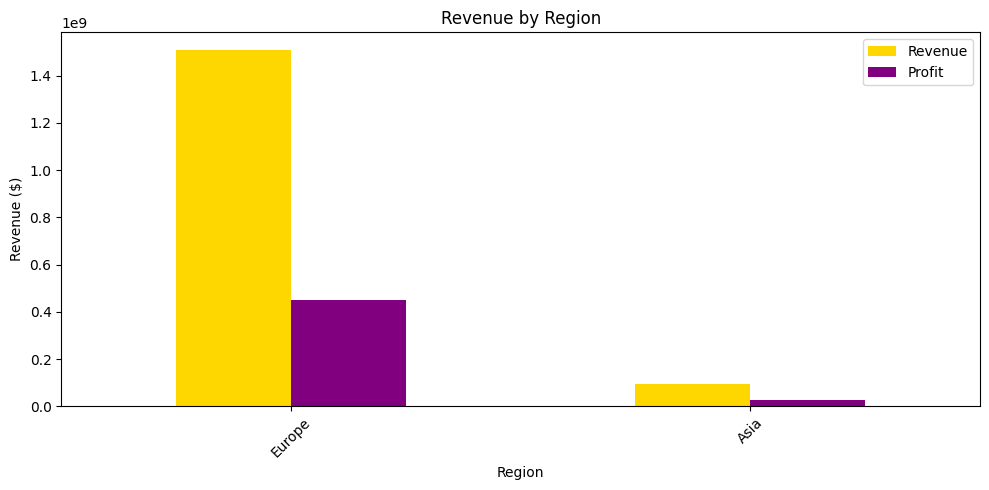

In [ ]:
region_summary.plot(
    kind="bar",
    figsize=(10, 5),
    title="Revenue by Region",
    color=["gold", "purple"]
)
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Key insights**:

- **Europe** dominates with the highest revenue and profit, making it the most important market for the company.

- **Asia** shows significantly lower revenue and profit in comparison, suggesting limited market penetration or lower demand in that region.

We would need to investigate further whether Europe benefits from a higher number of orders or higher-value products, and why Asia underperforms — possibly fewer countries, less marketing, or supply chain issues.

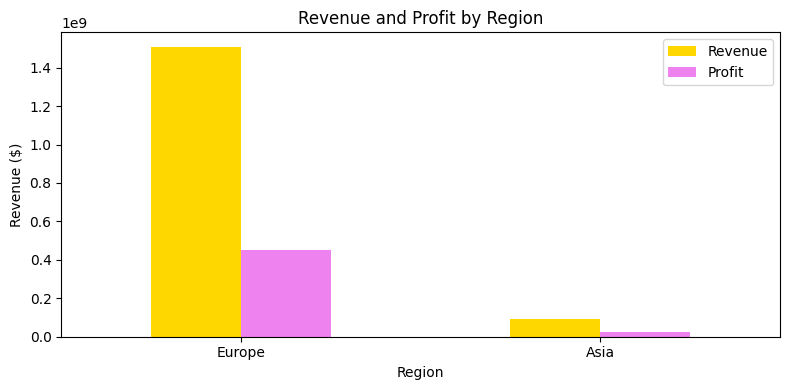

In [ ]:
region_summary = merged.groupby("Region")[["Revenue", "Profit"]].sum().sort_values("Revenue", ascending=False)
region_summary.plot(
    kind="bar",
    figsize=(8, 4),
    title="Revenue and Profit by Region",
    color=["gold", "violet"]
)
plt.ylabel("Revenue ($)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Key insights:**

- **Europe** is by far the most profitable and highest-revenue region, contributing the vast majority of the company’s earnings.

- **Asia** lags significantly behind Europe in both revenue and profit.

- The large gap may point to market concentration, stronger logistics, or a wider product offering in Europe compared to Asia.

It would be a good idea to investigate opportunities to grow sales in lower-performing regions.

In [ ]:
merged["Sales Channel"] = merged["Sales Channel"].str.strip().str.capitalize()


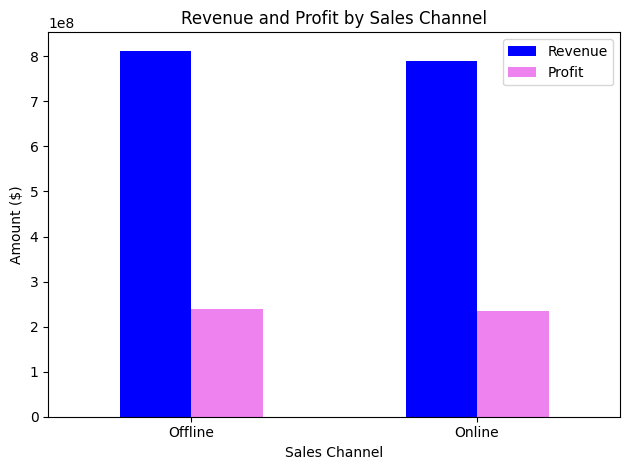

In [ ]:
channel_summary = merged.groupby("Sales Channel")[["Revenue", "Profit"]].sum()
channel_summary.plot(
    kind="bar",
    title="Revenue and Profit by Sales Channel",
    color=["blue", "violet"]
)
plt.ylabel("Amount ($)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Key observations**:

**Offline** and **Online channels** generate nearly equal revenue and profit — showing that both are essential contributors to the company's success.

The slight variations may be due to pricing strategies, product mix, or regional availability in each channel.



In [ ]:
merged["Order Date"] = pd.to_datetime(merged["Order Date"])
merged["Ship Date"] = pd.to_datetime(merged["Ship Date"])


In [ ]:
merged["Order Month"] = merged["Order Date"].dt.to_period("M")
merged["Order Year"] = merged["Order Date"].dt.year
merged["Order Weekday"] = merged["Order Date"].dt.day_name()
merged["Shipping Delay (days)"] = (merged["Ship Date"] - merged["Order Date"]).dt.days


In [ ]:
all_data = merged.copy()
monthly_all = all_data.groupby(["Order Month Name", "Product Category"])["Revenue"].sum().unstack()


month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

top5_monthly = top5_monthly.reindex(month_order)


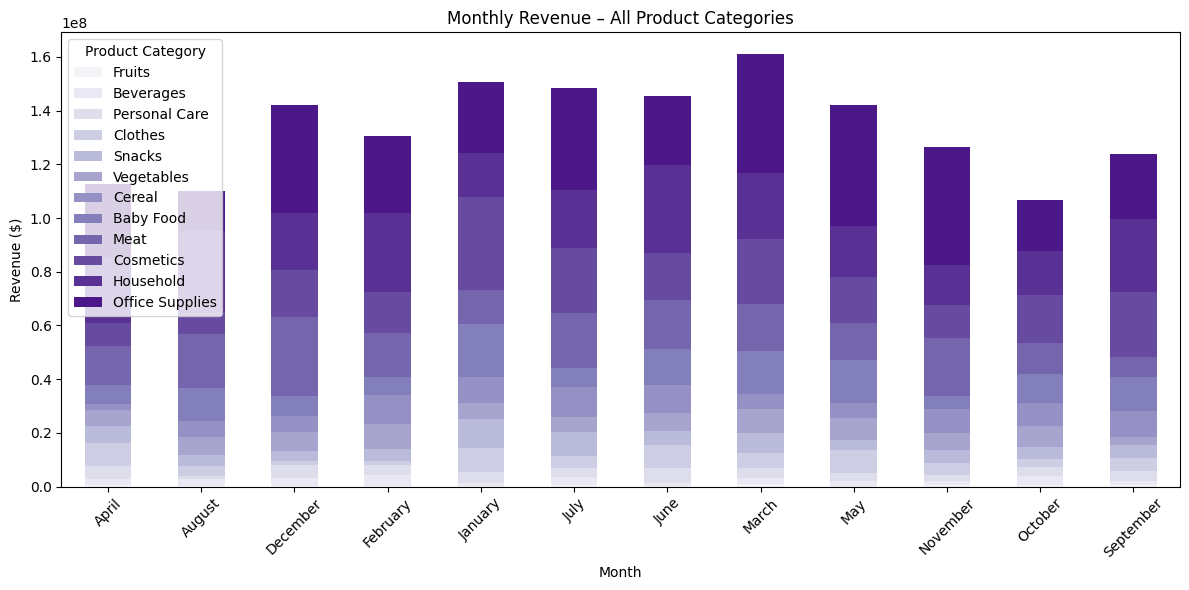

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


num_categories = merged["Product Category"].nunique()
purple_palette = sns.color_palette("Purples", num_categories)

monthly_all = merged.groupby(["Order Month Name", "Product Category"])["Revenue"].sum().unstack()


month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]


sorted_categories = merged.groupby("Product Category")["Revenue"].sum().sort_values().index

monthly_all = monthly_all[sorted_categories]

purple_palette = sns.color_palette("Purples", len(sorted_categories))

monthly_all.plot(
    kind="bar",
    stacked=True,
    figsize=(12, 6),
    color=purple_palette,
    title="Monthly Revenue – All Product Categories"
)

plt.xlabel("Month")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#####Monthly Trends:

- **March** leads with the highest total revenue, followed by **January** and **July**.

- The lowest revenue is observed in **October** and **August**.

- Revenue patterns vary month to month, with no strong seasonal spike, though a slight dip is visible in late summer (**August**) and early fall (**October**).
<br><br>

#####Revenue Contributors:
- **Office Supplies, Household**, and **Cosmetics** consistently dominate monthly contributions, regardless of overall volume

- **Fruits, Beverages**, and **Personal Care** contribute the least.


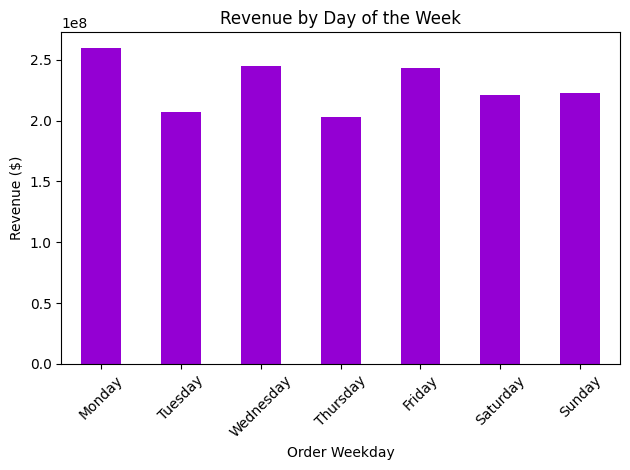

In [ ]:
weekday = merged.groupby("Order Weekday")["Revenue"].sum().reindex([
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"
])

weekday.plot(kind="bar", color="darkviolet", title="Revenue by Day of the Week")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Key insights:**

- **Monday** is the top-performing day in terms of revenue, closely followed by Wednesday and Friday.

- **Tuesday** and **Thursday** show the lowest revenue levels, suggesting slower midweek performance.

- **Weekend** sales (**Saturday** and **Sunday**) are moderate, not significantly lower than weekdays — indicating steady customer engagement throughout the week.

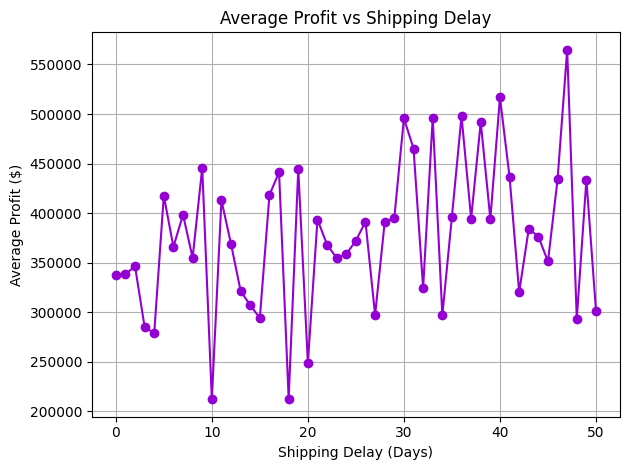

In [ ]:
delay_profit = merged.groupby("Shipping Delay (days)")["Profit"].mean()

delay_profit.plot(kind="line", marker="o",  color="darkviolet", title="Average Profit vs Shipping Delay")
plt.xlabel("Shipping Delay (Days)")
plt.ylabel("Average Profit ($)")
plt.grid(True)
plt.tight_layout()
plt.show()


**Key insights:**

- There is no strong downward trend in profit as shipping delay increases — moreover, longer shipping times are sometimes associated with higher average profits.

- This may suggest that higher-value or bulk orders take longer to prepare and deliver, which boosts the average profit per sale.

- Faster shipping is not necessarily correlated with better profit. However, monitoring delays remains important for customer satisfaction, even if it doesn’t harm profitability.

- Spikes in revenue may be linked to product launches, promotions, or external market conditions.

<br><br>
##**Conclusion**

####**Key Findings:**
- **High-Performing Product Categories:**
Office Supplies, Household, and Cosmetics generated the highest revenue, while categories like Beverages and Fruits contributed the least.

- **Regional Performance:**
Europe was the dominant market in both revenue and profit, far surpassing Asia, which showed limited penetration and opportunity for growth.

- **Sales Channels:**
Revenue and profit were almost equally distributed between Online and Offline sales. A small inconsistency in channel naming was discovered and corrected during preprocessing.

- **Time-Based Trends:**
Revenue showed volatility across months and years without a strong seasonal trend. However, Monday emerged as the most profitable day of the week.

- **Shipping Delays:**
Surprisingly, shipping delays did not negatively impact average profit. In fact, longer delays were often associated with higher profits — likely due to large or bulk orders.


<br><br>

####**Business Impact - Action Plan:**

- Focus marketing on top-performing product categories

- Prioritize operations and logistics in Europe

- Investigate underperformance in Asia and on mid-week days

- Consider flexible shipping options for large-volume orders